In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the dataset using pandas read_csv
df= pd.read_csv('titanic_train.csv')
df.head()

df.describe()

df.info()

df.isnull().sum()

#dropping column not in use and having maximum number of null values i.e. Cabin column
df_cleaned = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_cleaned.head()

df_cleaned.describe()

df_cleaned.isnull().sum()

# Group the data frame by values in Survived column, and count the number of occurrences of each group.
survived_count = df.groupby('Survived')['Survived'].count()
survived_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    549
1    342
Name: Survived, dtype: int64

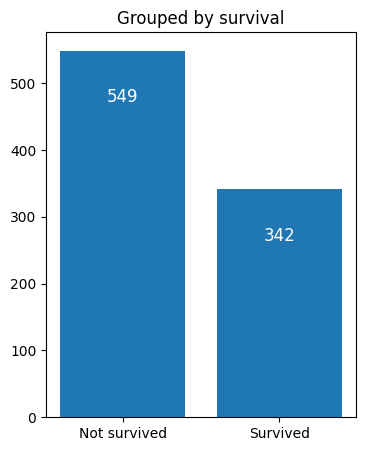

In [3]:
# Grouped by survival
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

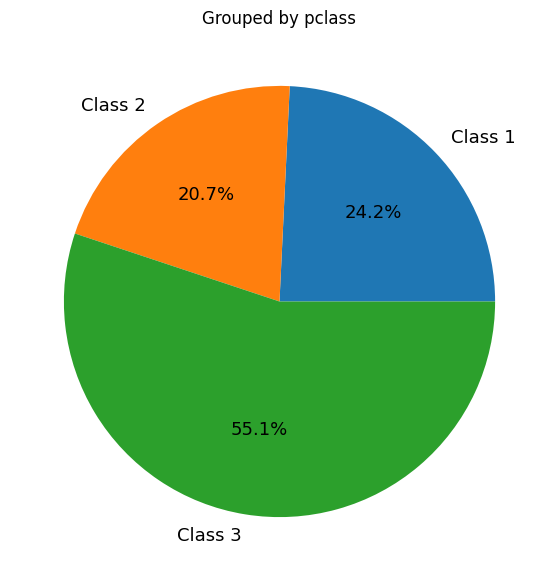

In [4]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

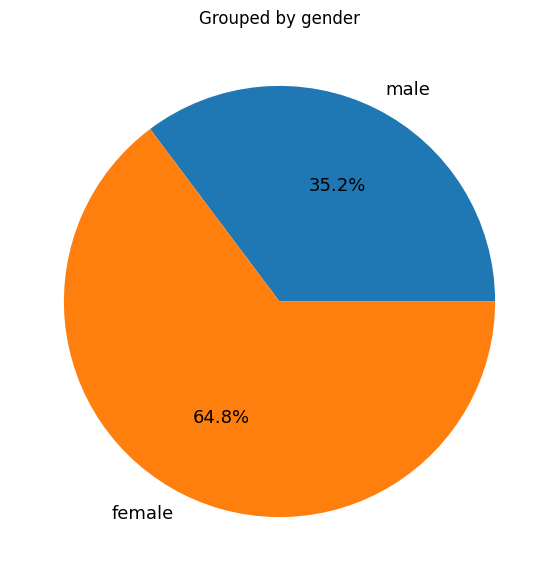

In [5]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
sex_count = df.groupby('Sex')['Sex'].count()
sex_count

plt.figure(figsize=(7,7))
plt.title('Grouped by gender')
plt.pie(sex_count.values, labels=['male', 'female'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

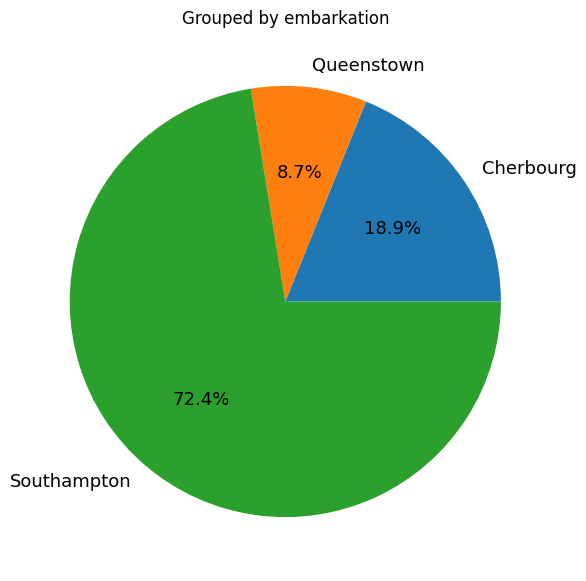

In [6]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
embark_count = df.groupby('Embarked')['Embarked'].count()
embark_count

plt.figure(figsize=(7,7))
plt.title('Grouped by embarkation')
plt.pie(embark_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

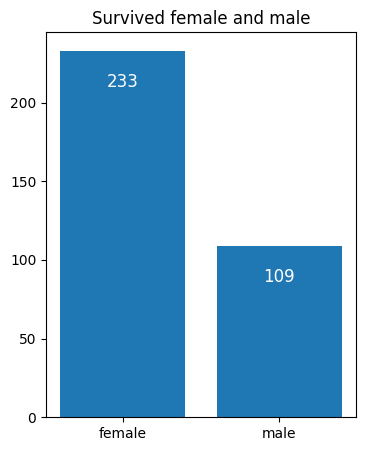

In [7]:
#Survivial number according to gender or sex i.e. Male and Female
survived_sex = df.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [8]:
#sns.plt.hist(df_cleaned.groupby(['Pclass', 'Survived', 'Sex']).size())
grouped_by_pclass = df_cleaned.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()

df_cleaned.groupby(['Pclass'])['Survived'].sum()/df_cleaned.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Text(0.5, 0.98, 'Class and gender wise segregation of passengers')

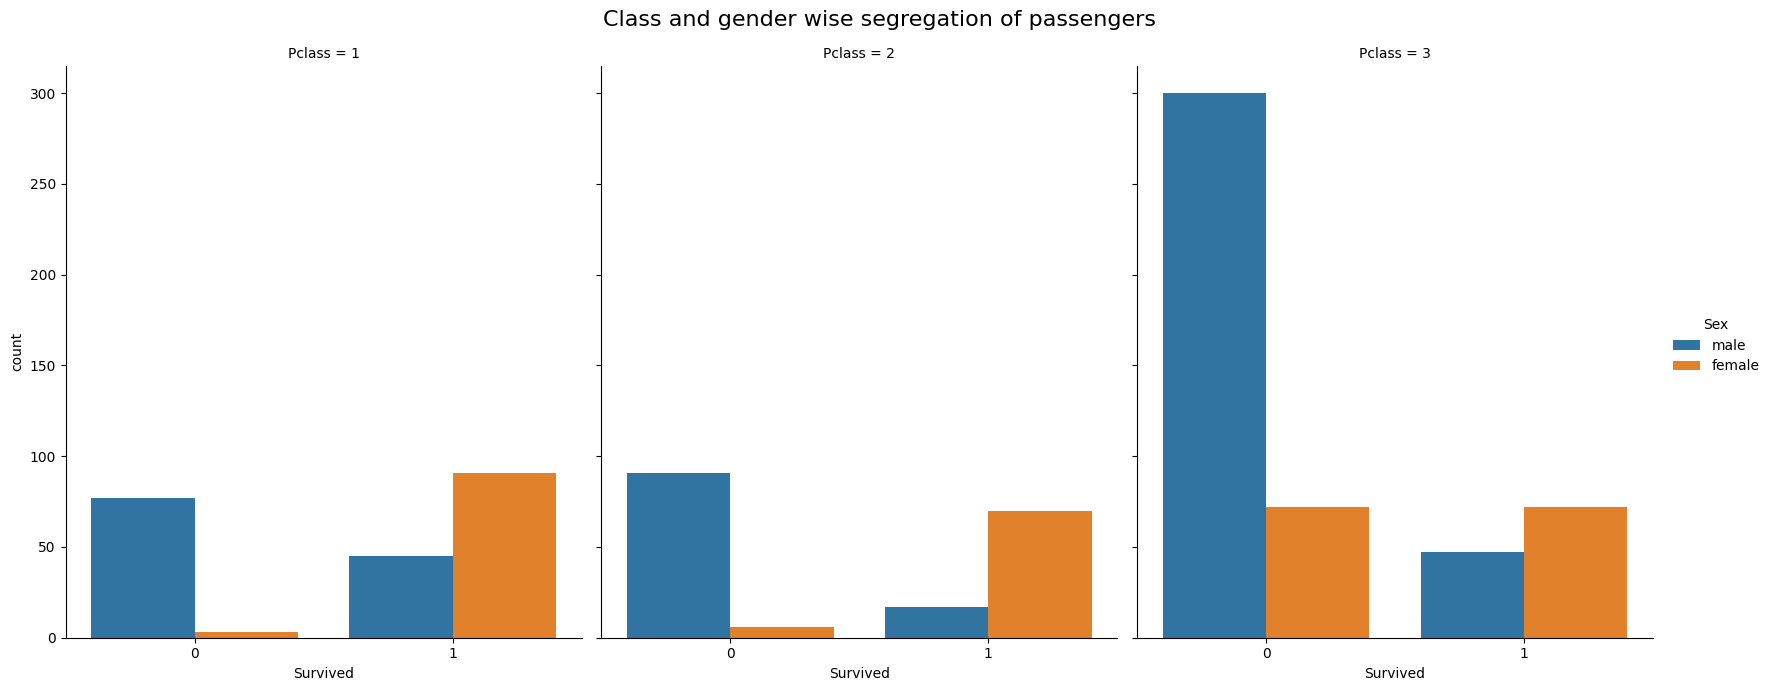

In [9]:
sns.catplot(x='Survived', col='Pclass', hue='Sex', data=df_cleaned, kind='count', height=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)

Text(0.5, 0.98, 'Scatterplot of passengers w.r.t Fare and Age for diff. ports')

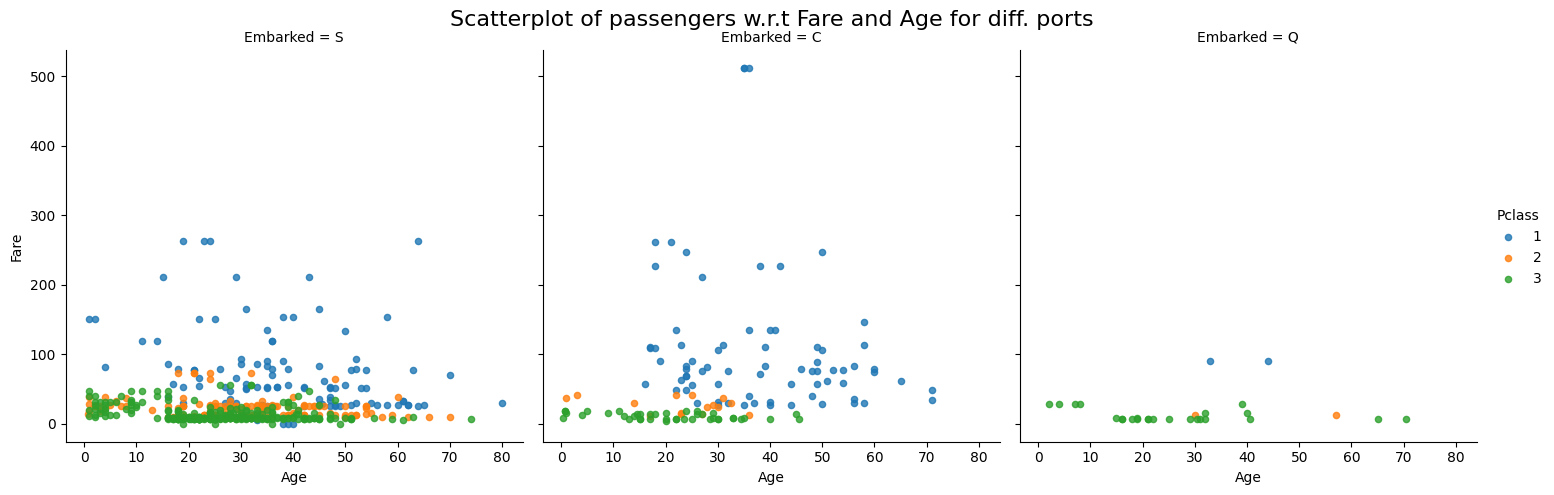

In [10]:
sns.lmplot(x='Age', y='Fare', data=df_cleaned, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})

plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)